<a href="https://colab.research.google.com/github/profshai/neural-networks-deep-learning/blob/main/cnn_images_classification_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification - CNN



The dataset is the Canadian Institute For Advanced Research dataset (CIFAR-10) and consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset consists of 60,000 32x32 color images and 6,000 images of each class. Images have low resolution (32x32). 

- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html


### Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

### Import dataset

In [ ]:
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_test.shape

(10000, 1)

### Data visualization

[3]


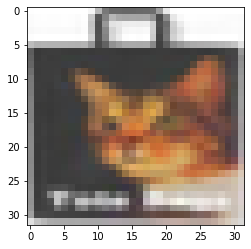

In [ ]:
i = 3000
plt.imshow(X_train[i])
print(y_train[i])

Class 3 is a cat.

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


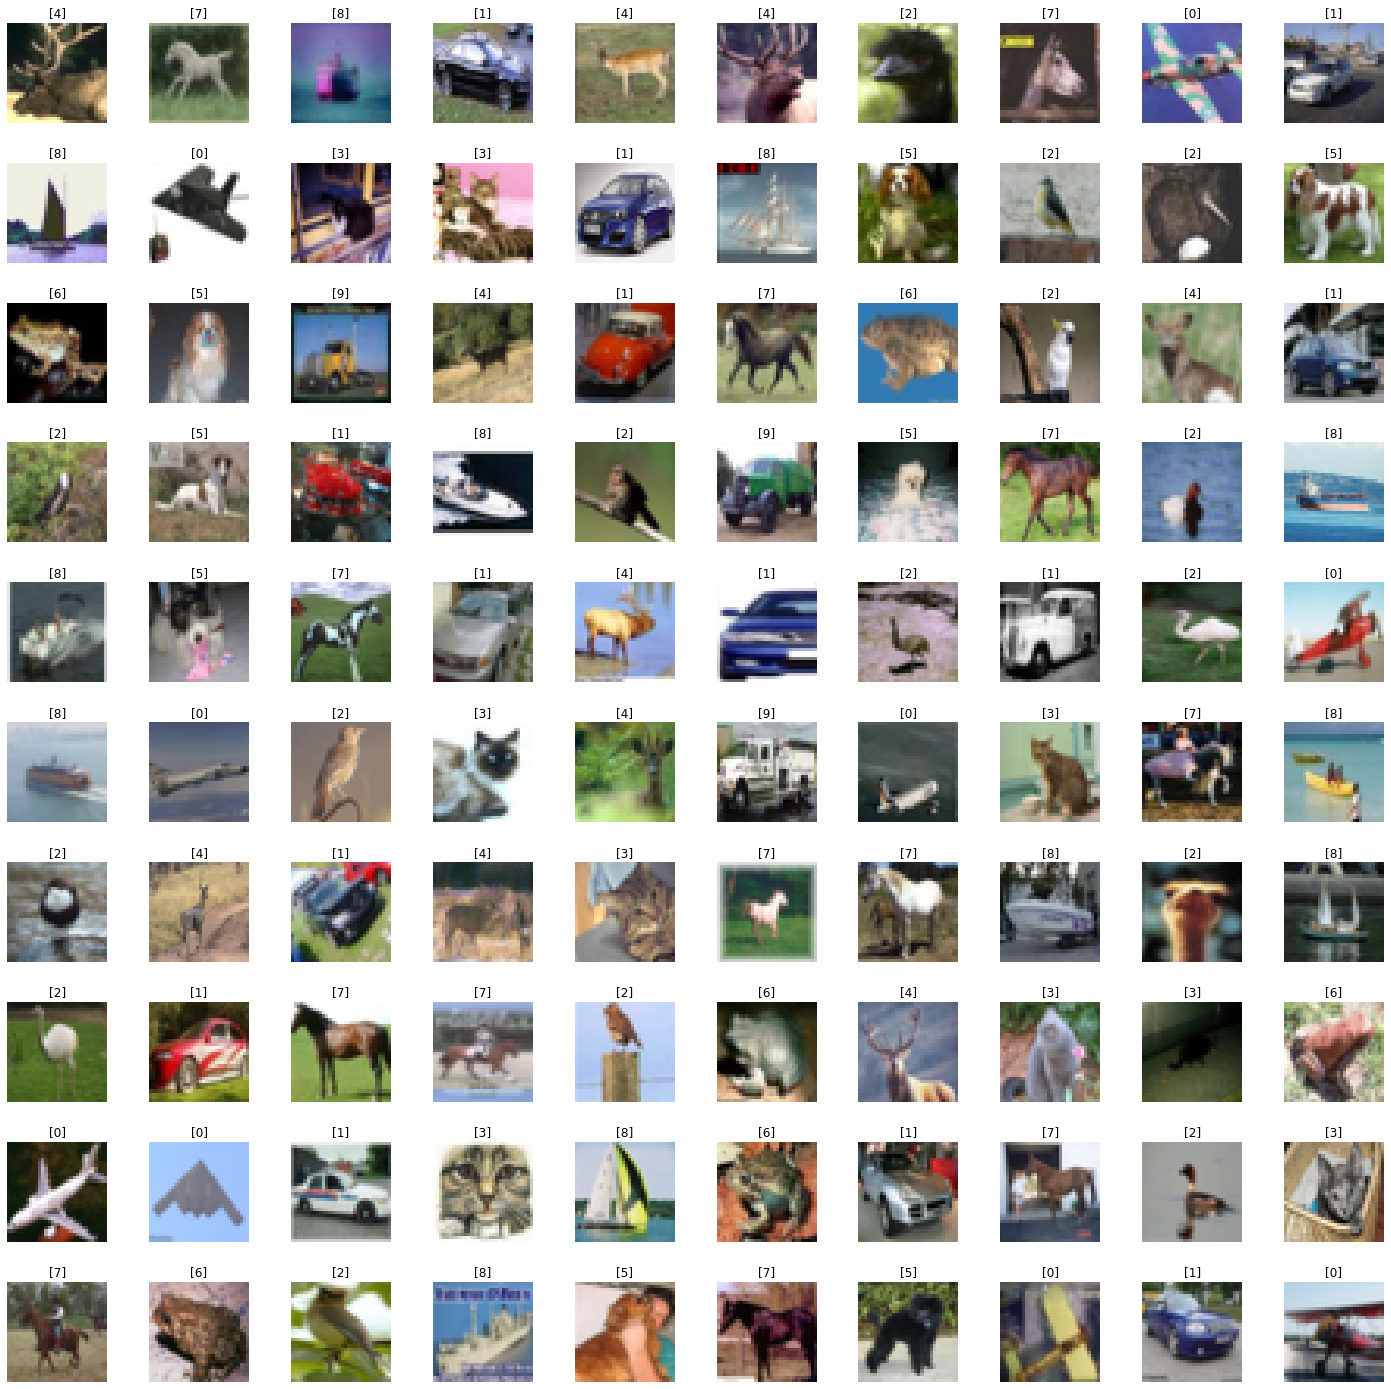

In [ ]:
W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

# We want 225 (15 *15) images displayed
for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
# Add space between images    
plt.subplots_adjust(hspace = 0.4)

### Data preparation

In [ ]:
# Convert images into float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

Let's convert y_train from numbers to categories

In [ ]:
# We have 10 categories
number_cat = 10
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, number_cat)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test = to_categorical(y_test, number_cat)

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
# Normalize the X values
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train

In [ ]:
input_shape = X_train.shape[1:]
input_shape

(32, 32, 3)

In [ ]:
y_train.shape

(50000, 10)

### Train model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = input_shape))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))


cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 128, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [ ]:
from tensorflow.keras import optimizers
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = optimizers.RMSprop(learning_rate = 0.001), metrics = ['accuracy'])

In [ ]:
# Training the model
history = cnn_model.fit(np.array(X_train), np.array(y_train), batch_size = 32, epochs=5, shuffle = True)

Epoch 1/5
1563/1563 [==============================] - 171s 99ms/step - loss: 1.7543 - accuracy: 0.3614
Epoch 2/5
1563/1563 [==============================] - 153s 98ms/step - loss: 1.2018 - accuracy: 0.5757
Epoch 3/5
1563/1563 [==============================] - 154s 99ms/step - loss: 1.0538 - accuracy: 0.6295
Epoch 4/5
1563/1563 [==============================] - 155s 99ms/step - loss: 0.9643 - accuracy: 0.6617
Epoch 5/5
1563/1563 [==============================] - 153s 98ms/step - loss: 0.9179 - accuracy: 0.6769


### Evaluate model

In [ ]:
predicted_classes = cnn_model.predict_classes(X_test) 
predicted_classes

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([5, 8, 8, ..., 5, 0, 7])

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
# We want the actual labels of y_test
y_test = y_test.argmax(1)
y_test

array([3, 8, 8, ..., 5, 1, 7])

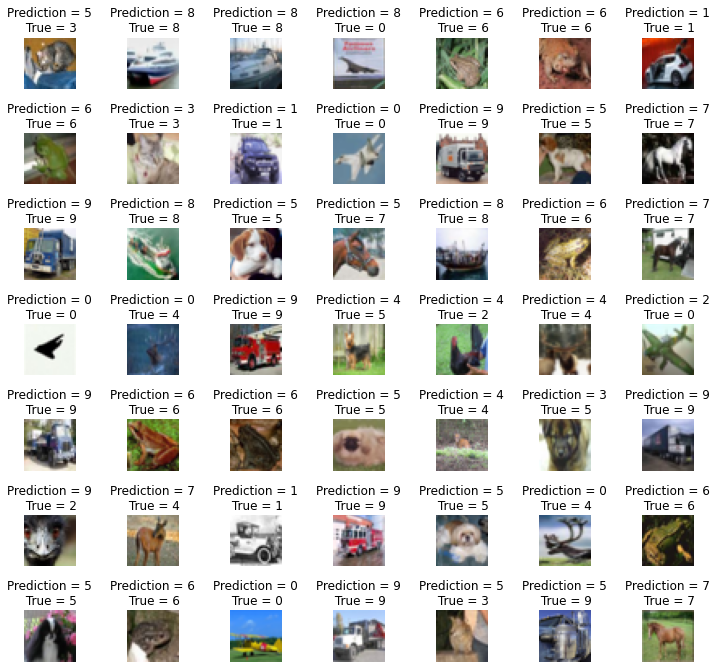

In [ ]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

### Save model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 
directory = os.path.join(os.getcwd(), 'drive/My Drive/Colab Notebooks/saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

## Improving model with data augmentation

- Image Augmentation is the process of artificially increasing the variations of the images in the datasets by flipping, enlarging, rotating the original images. 
- Augmentations also include shifting and changing the brightness of the images.

### Import library and CIFAR 10 Dataset again

In [ ]:
import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

### Train model

In [ ]:
number_cat = 10
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, number_cat)

In [ ]:
y_test = to_categorical(y_test, number_cat)

In [ ]:
# Normalize the X values
X_train = X_train/255
X_test = X_test/255

In [ ]:
input_shape = X_train.shape[1:]
input_shape

(32, 32, 3)

In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = input_shape))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))


cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 128, activation = 'relu'))
cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [ ]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(learning_rate = 0.001), metrics = ['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
                             )

In [ ]:
datagen.fit(X_train)

In [ ]:
history = cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs=5, shuffle = True)

Epoch 1/5
   1/1563 [..............................] - ETA: 3:21 - loss: 1.8275 - accuracy: 0.2188

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


1563/1563 [==============================] - 184s 118ms/step - loss: 1.6805 - accuracy: 0.3943
Epoch 2/5
1563/1563 [==============================] - 185s 118ms/step - loss: 1.6081 - accuracy: 0.4216
Epoch 3/5
1563/1563 [==============================] - 184s 117ms/step - loss: 1.5544 - accuracy: 0.4428
Epoch 4/5
1563/1563 [==============================] - 184s 118ms/step - loss: 1.5295 - accuracy: 0.4542
Epoch 5/5
1563/1563 [==============================] - 184s 118ms/step - loss: 1.5037 - accuracy: 0.4656


In [ ]:
score = cnn_model.evaluate(X_test, y_test)
print('Test accuracy', score[1])

313/313 [==============================] - 8s 25ms/step - loss: 1.5228 - accuracy: 0.4433
Test accuracy 0.4433000087738037


In [ ]:
# save the model
directory = os.path.join(os.getcwd(), 'drive/My Drive/Colab Notebooks/saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')
cnn_model.save(model_path)

#### End of Notebook!